In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot as hvp
import datetime
import altair as alt
import seaborn as sns

### DataFrame for Drawdown

In [2]:
# Creating a range of dates
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2023, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='D')
# Dates df
dates_df = pd.DataFrame(date_range, columns=['Date'])
#print(dates_df.head(1825))

# Creating a range of random "prices"
portfolio_df = pd.DataFrame(
    {
    "fake1": np.random.uniform(100, -50, 100),
    "fake2": np.random.uniform(100, -50, 100),
    "fake3": np.random.uniform(100, -50, 100)
    }
    )
f1_portfolio_df = portfolio_df["fake1"].to_frame()

# Concatinating and finalizing test data
returns = pd.concat([dates_df, portfolio_df], join = "inner", axis = 1)
returns.set_index('Date', inplace = True)
returns = pd.DataFrame(returns)
returns = returns.reset_index().rename(columns={'Date': 'date'})
returns.set_index('date', inplace = True)

### Data Frame for Portfolio Pie Chart

In [3]:
# Creating DataFrame for Bitcoin
btc_portfolio_df = pd.DataFrame({
    'stock': ['BTC:USD'],
    'position_size': np.random.uniform(10, 150, size = 1)
})

# Creating DataFrame for Stocks
stock_portfolio_df = pd.DataFrame({
    'stock': ['AMC', 'VSCO', 'TSLA', 'GOOGL'],
    'position_size': np.random.uniform(1000, 10000, 4)  # for 5 stocks
})

# Combining DataFrames
size_portfolio_df = pd.concat([btc_portfolio_df, stock_portfolio_df], axis = 0).reset_index(drop = True)

# Renaming stock column to securities
size_portfolio_df = size_portfolio_df.rename(columns = {'stock' : 'securities'})

### Portfolio Pie Chart Function

In [4]:
# Defining Portfolio pie chart function
def portfolio_piechart (holdings, size):
    selection = alt.selection_single()
    pie_chart = alt.Chart(size_portfolio_df).mark_arc(innerRadius=50).encode(
        theta = alt.Theta(field = 'position_size', type = 'quantitative'),
        color = alt.Color(field = 'securities', type = 'nominal'),
        tooltip=['securities', 'position_size']
    )
    return pie_chart

### Portfolio Pie Chart

In [5]:
one = size_portfolio_df['securities']
two = size_portfolio_df['position_size']
user_in_holdings = portfolio_piechart(one, two)
user_in_holdings

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)

In [6]:
initial_investment = 10000

### Cumulative Returns

In [7]:
def cumulative_returns(df):
    return (1 + df).cumprod()

In [8]:
user_cr = cumulative_returns(portfolio_df)
user_cr

,fake1,fake2,fake3
0,9.57,-23.57,-32.26
1,826.12,-1953.47,-2403.40
2,21487.79,-144278.67,19688.38
3,-319941.06,-6532314.77,1196079.96
4,-22505851.56,-269644082.98,-17699004.08
...,...,...,...
95,-1660894243351350757811715276901521166230956204...,64287370754789170203935432693573762037914029025...,-5930893788543936351505593155577868674634497897...
96,-7493978990043776093721557696942857114733788395...,24942463884595091713479622206066684908476662771...,-5853331948683717928647273205427888240883708342...
97,-3924607265302792527654907076532660771332317336...,-1221626267389910863691191203025261227015692859...,69207272253017451357678092584556265823136722468...
98,-7655730153726858980418857979581158488597779457...,-1162529545346147197736125789981058110694221085...,-3315228244058720783912377814178563171635398592...


### Correlation

In [9]:
returns_cor = returns.corr()
returns_cor

,fake1,fake2,fake3
fake1,1.00,0.17,0.02
fake2,0.17,1.00,0.05
fake3,0.02,0.05,1.00


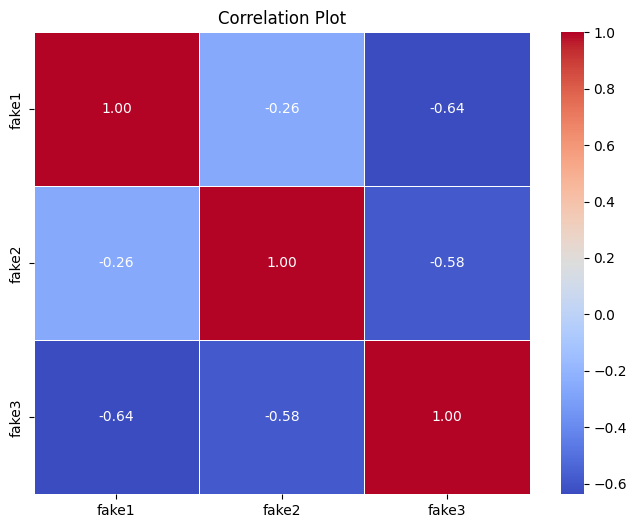

In [10]:
df = pd.DataFrame(returns_cor)

# Create a correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()

### Correlation Plot Function

In [11]:

def correlation_chart(df, quant_x,  quant_y):
    corr_chart = alt.Chart(df).mark_circle(size = 60).encode(
        x=alt.X(f'{quant_x}:Q', title = "Asset_1"),
        y=alt.Y(f'{quant_y}:Q', title = "Asset_2"),
        tooltip= [quant_x, quant_y]
    ).interactive()
    return returns_cor

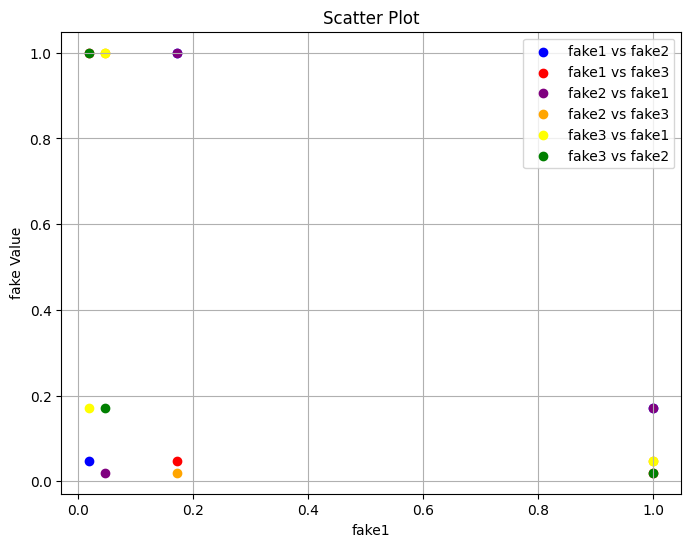

In [35]:


df = pd.DataFrame(returns_cor)

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot for Variable1 against Variable2
plt.scatter(df['fake1'], df['fake2'], label='fake1 vs fake2', color='blue')

# Scatter plot for Variable1 against Variable3
plt.scatter(df['fake1'], df['fake3'], label='fake1 vs fake3', color='red')
plt.scatter(df['fake2'], df['fake1'], label='fake2 vs fake1', color='purple')
plt.scatter(df['fake2'], df['fake3'], label='fake2 vs fake3', color='orange')
plt.scatter(df['fake3'], df['fake2'], label='fake3 vs fake1', color='yellow')
plt.scatter(df['fake3'], df['fake1'], label='fake3 vs fake2', color='green')


# Customize the plot
plt.title('Scatter Plot')
plt.xlabel('fake1')
plt.ylabel('fake Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Correlation Chart

In [13]:
correlation_chart(returns, 'fake1', 'fake2')
correlation_chart

<function __main__.correlation_chart(df, quant_x, quant_y)>

### Covariance

In [14]:
def covariance(df, ticker, market):
    return df[ticker].cov(df[market])

In [15]:
user_covariance = covariance(portfolio_df, 'fake2', 'fake3')
user_covariance

82.09471355141089

### Variance

In [16]:
def variance(df, market):
    return df[market].var()

In [17]:
user_variance = variance(portfolio_df, 'fake3')
user_variance

1821.2813918131276

### Drawdown

In [18]:
def drawdown(df, tickers):
    Roll_Max = df[tickers].cummax()
    Daily_Drawdown = df[tickers]/Roll_Max - 1.0
    Max_Daily_Drawdown = Daily_Drawdown.cummin() * 100

In [19]:
user_drawdown = drawdown(portfolio_df, 'fake1')
user_drawdown

### Drawdown Chart Function

In [20]:
def drawdown_chart(df, date, quant):
    '''
    df: dataframe
    date: str: should be a date column name
    quant: str: should be a quantitative data type
    '''
    chart = alt.Chart(df.reset_index()).mark_bar().encode(
        x = date + ':T',  # T specifies temporal data type for x-axis
        y = quant + ':Q',  # Q specifies a quantitative data type for y-axis
        color = alt.condition(
            getattr(alt.datum, quant) > 0,
            alt.value("Green"),  # The positive color
            alt.value("red")
    ), tooltip= [date + ':T', quant + ':Q']
    ).properties(width=800)
    chart = chart.interactive()
    return chart

In [21]:
user_drawdown = drawdown_chart(returns, 'date', 'fake1')
user_drawdown

alt.Chart(...)

In [22]:
def tracking_error(df, tickers, market):
    track_error = np.sqrt(sum([i**2 for i in df[tickers] - df[market]]))
    return track_error

In [23]:
user_tracking_error = tracking_error(portfolio_df, 'fake2', 'fake3')
user_tracking_error

578.725849141165

### Beta

In [24]:
def beta(covariance, variance):
    chart_beta = covariance / variance
    chart_beta = chart_beta
    return chart_beta

In [25]:
user_beta = beta(user_covariance, user_variance)
user_beta

0.04507524972277003

### Sharpe Ratio

In [26]:
def sharpe_ratio(df):
    sharpe = (df.mean()*252) / (df.std() * np.sqrt(252))
    return sharpe

In [27]:
user_sharpe_ratio = sharpe_ratio(portfolio_df)
user_sharpe_ratio

fake1    9.50
fake2    9.26
fake3   10.81
dtype: float64

### Return on Investment Function

In [28]:
def return_on_investment(investment, returns):
    cumulative_profit = investment * returns
    return_oi = (cumulative_profit - investment) / investment
    return(return_oi)

### ROI 

In [29]:
user_roi = return_on_investment(initial_investment, user_cr)
user_roi

,fake1,fake2,fake3
0,8.57,-24.57,-33.26
1,825.12,-1954.47,-2404.40
2,21486.79,-144279.67,19687.38
3,-319942.06,-6532315.77,1196078.96
4,-22505852.56,-269644083.98,-17699005.08
...,...,...,...
95,-1660894243351350974426535130090182070794564340...,64287370754789178467135042571681248936855379434...,-5930893788543936351505593155577868674634497897...
96,-7493978990043776093721557696942857114733788395...,24942463884595091713479622206066684908476662771...,-5853331948683718638450714900356492292957739483...
97,-3924607265302792527654907076532660771332317336...,-1221626267389910863691191203025261227015692859...,69207272253017451357678092584556265823136722468...
98,-7655730153726858980418857979581158488597779457...,-1162529545346147197736125789981058110694221085...,-3315228244058720783912377814178563171635398592...


### ROI Chart

In [30]:
def roi_chart(df, initial_investment = 10000, width = 400):
    # Transforms to long format
    df_melted = df.reset_index().melt(var_name = 'Asset', value_name = 'ROI').query("Asset != 'index'")

    # Creating a bar chart
    bars = alt.Chart(df_melted).mark_bar().encode(
        x = alt.X('Asset:N', title = "Asset"),
        y = alt.Y('ROI:Q', title = "Return on Investment"),
    )

    # Creating a DataFrame for the initial investment line
    initial_investment_df = pd.DataFrame({
        'Asset': df_melted['Asset'].unique(),
        'Initial Investment': [initial_investment] * len(df_melted['Asset'].unique())
    })

    # Creating a line chart for the initial investment
    line = alt.Chart(initial_investment_df).mark_rule(color = 'firebrick').encode(
        y = 'Initial Investment:Q'
    )

    return alt.layer(bars, line)

In [31]:
roi_chart(user_cr)

alt.LayerChart(...)